In [2]:
#dataset Splitting

import splitfolders
input_folder="D:\\deeplearning\\scratches\\data\\note_dataset"
output_folder = 'scratches/data/note_dataset_splitted'
splitfolders.ratio(input_folder,output="dataset",seed=42,ratio=(.7,.2,.1),group_prefix=None)

Copying files: 4583 files [00:18, 262.78 files/s]

KeyboardInterrupt: 

In [1]:
dataset_path = 'D:\\deeplearning\\scratches\\data\\note_dataset_splitted'

In [2]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torch.utils.data import Dataset, DataLoader,TensorDataset,random_split,SubsetRandomSampler, ConcatDataset
from sklearn.model_selection import KFold
import random

In [3]:
import os
print(os.listdir(dataset_path))
classes = os.listdir(dataset_path + "/train")
print(classes)
print(len(classes))

['test', 'train', 'val']
['10', '100', '1000', '2', '20', '200', '5', '50', '500']
9


In [4]:
train_transforms = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
    transforms.Resize((64,64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),

    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [5]:
from torchvision.datasets import ImageFolder
train_ds = ImageFolder(dataset_path+'/train',transform=train_transforms)
valid_ds= ImageFolder(dataset_path+'/val',transform=val_transforms)
len(train_ds)
len(valid_ds)

14305

In [6]:
train_loader = DataLoader(train_ds, batch_size=100, shuffle=True)
val_loader = DataLoader(valid_ds, batch_size=100, shuffle=False)

In [7]:
batch_size=200



In [11]:
import torchvision
model = torchvision.models.vgg16(pretrained=True)
for param in model.parameters():
    param.requires_grad = False
model.classifier[6] = nn.Linear(4096, 9)


C:\Users\mohib\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\mohib\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)

In [13]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)
device

device(type='cuda', index=0)

In [14]:
val_accs=[]
val_losses=[]
train_losses=[]

In [24]:
from tqdm import tqdm
import time
num_epoch=10
for epoch in range(num_epoch):
    model.train()
    running_loss = 0.0

    t_start = time.time()

    for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1} - Training", leave=False):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(train_ds)
    train_losses.append(epoch_loss) # for storing history

    # Validate model
    model.eval()
    val_loss = 0.0
    val_correct = 0

    with torch.no_grad():
        for inputs, labels in tqdm(val_loader, desc=f"Epoch {epoch+1} - Validation", leave=False):
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)

            _, preds = torch.max(outputs, 1)
            val_correct += torch.sum(preds == labels.data)

    val_loss = val_loss / len(valid_ds)
    val_acc = val_correct.double() / len(valid_ds)

    #for storing history
    val_accs.append(val_acc)
    val_losses.append(val_loss)

    t_end = time.time()
    epoch_time = t_end - t_start

    print(f"Epoch {epoch+1} | Train Loss: {epoch_loss:.3f} | Val Loss: {val_loss:.3f} | Val Acc: {val_acc:.3f} | Time: {epoch_time:.2f}s")

Epoch 1 | Train Loss: 0.278 | Val Loss: 0.098 | Val Acc: 0.968 | Time: 228.51s


Epoch 2 | Train Loss: 0.281 | Val Loss: 0.109 | Val Acc: 0.964 | Time: 387.92s


Epoch 3 | Train Loss: 0.276 | Val Loss: 0.109 | Val Acc: 0.962 | Time: 376.76s


Epoch 4 | Train Loss: 0.274 | Val Loss: 0.081 | Val Acc: 0.975 | Time: 441.16s


Epoch 5 | Train Loss: 0.274 | Val Loss: 0.097 | Val Acc: 0.969 | Time: 337.17s


Epoch 6 | Train Loss: 0.277 | Val Loss: 0.082 | Val Acc: 0.975 | Time: 255.59s


Epoch 7 | Train Loss: 0.272 | Val Loss: 0.079 | Val Acc: 0.976 | Time: 266.62s


Epoch 8 | Train Loss: 0.282 | Val Loss: 0.086 | Val Acc: 0.973 | Time: 369.96s


Epoch 9 | Train Loss: 0.283 | Val Loss: 0.070 | Val Acc: 0.978 | Time: 190.63s


Epoch 10 | Train Loss: 0.274 | Val Loss: 0.076 | Val Acc: 0.975 | Time: 146.92s


In [25]:
  test_transforms = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_dataset = ImageFolder(dataset_path+'/test', transform=test_transforms)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


In [26]:
train_losses,val_losses,val_accs
val_accs =torch.tensor(val_accs)
val_accs=val_accs.tolist()

In [27]:

correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy on test set: {(correct/total)*100}%")

Accuracy on test set: 97.66824909243228%


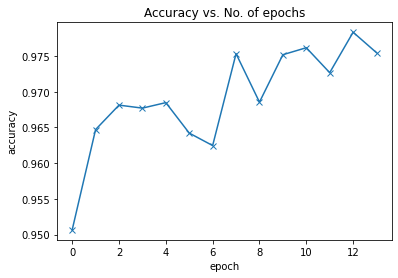

In [28]:
import matplotlib.pyplot as plt
def plot_accuracies(accuracy):

    plt.plot(val_accs, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs')
plot_accuracies(val_accs)

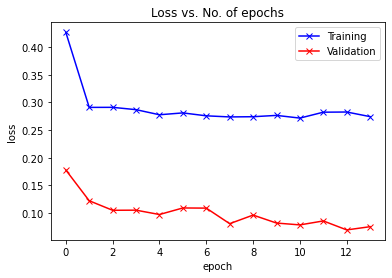

In [29]:
def plot_losses(trainloss,valloss):


    plt.plot(trainloss, '-bx')
    plt.plot(valloss, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])

    plt.title('Loss vs. No. of epochs')
plot_losses(train_losses,val_losses)